In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/Users/rohanpatil/Desktop/Rohan Patil - DSAI/Course Notebooks/DATA/Ames_Housing_Data.csv')

In [7]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [110]:
x_numeric = data.select_dtypes(exclude='object')

In [113]:
x_numeric

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,526301100,20,141.00000,31770,6,5,1960,1960,112.0,639.0,...,210,62,0,0,0,0,0,5,2010,215000
1,526350040,20,80.00000,11622,5,6,1961,1961,0.0,468.0,...,140,0,0,0,120,0,0,6,2010,105000
2,526351010,20,81.00000,14267,6,6,1958,1958,108.0,923.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,526353030,20,93.00000,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,0,0,0,0,4,2010,244000
4,527105010,60,74.00000,13830,5,5,1997,1998,0.0,791.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,923251180,20,160.00000,20000,5,7,1960,1996,0.0,1224.0,...,474,0,0,0,0,0,0,9,2006,131000
2925,923275080,80,37.00000,7937,6,6,1984,1984,0.0,819.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,923276100,20,69.22459,8885,5,5,1983,1983,0.0,301.0,...,164,0,0,0,0,0,0,6,2006,131000
2928,924100070,20,77.00000,10010,5,5,1974,1975,0.0,1071.0,...,240,38,0,0,0,0,0,4,2006,170000


In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [112]:
scaler.fit_transform(x_numeric)

array([[-0.96003759, -0.87814044,  3.36375602, ..., -0.44882098,
         1.67918374,  0.35973648],
       [-0.9597778 , -0.87814044,  0.49167855, ..., -0.0799006 ,
         1.67918374, -1.02414243],
       [-0.95977265, -0.87814044,  0.53876178, ..., -0.0799006 ,
         1.67918374, -0.18123437],
       ...,
       [ 1.1472363 , -0.87814044, -0.01566263, ..., -0.0799006 ,
        -1.3561548 , -0.69704378],
       [ 1.1516102 , -0.87814044,  0.35042884, ..., -0.81774136,
        -1.3561548 , -0.20639581],
       [ 1.15188082,  0.08358539,  0.20917912, ...,  1.76470128,
        -1.3561548 ,  0.02005711]])

## Feature Engineering 

### 1. Missing values detection


In [11]:
data.shape

(2930, 81)

In [ ]:
data.isna().sum().sort_values(ascending=False).head(20) / 2930 * 100

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Cond        5.426621
Garage Finish      5.426621
Garage Yr Blt      5.426621
Garage Qual        5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
dtype: float64

### if the no. of missing rows > 50% -> drop it 

In [14]:
drop_cols = ['Pool QC','Misc Feature','Alley','Fence','Mas Vnr Type','Fireplace Qu']

data.drop(columns=drop_cols, inplace=True)

In [15]:
data.shape

(2930, 75)

In [40]:
data.isna().sum().sort_values(ascending=False).head(20) /2930

Garage Yr Blt     0.054266
Garage Finish     0.054266
Garage Qual       0.054266
Garage Type       0.053584
Bsmt Exposure     0.028328
BsmtFin Type 2    0.027645
BsmtFin Type 1    0.027304
Bsmt Qual         0.027304
Bsmt Cond         0.027304
Mas Vnr Area      0.007850
Bsmt Half Bath    0.000683
Bsmt Full Bath    0.000683
BsmtFin SF 2      0.000341
BsmtFin SF 1      0.000341
Bsmt Unf SF       0.000341
Total Bsmt SF     0.000341
Garage Area       0.000341
Garage Cars       0.000341
Electrical        0.000341
Kitchen Qual      0.000000
dtype: float64

### 2.1 If you column is of type Numerical(int, float) -> mean, median

In [17]:
data['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2930, dtype: float64

In [36]:
mean_lot_frontage = data['Lot Frontage'].mean()
mean_lot_frontage

69.22459016393442

In [23]:
median_lot_frontage = data['Lot Frontage'].median()
median_lot_frontage

68.0

In [37]:
data['Lot Frontage'].fillna(mean_lot_frontage, inplace=True)

In [25]:
data['Garage Cond']

0        TA
1        TA
2        TA
3        TA
4        TA
       ... 
2925     TA
2926     TA
2927    NaN
2928     TA
2929     TA
Name: Garage Cond, Length: 2930, dtype: object

### 2.2 If your column is of data type "Object/Categorical" -> Mode

In [26]:
data['Garage Cond'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [28]:
data['Garage Cond'].value_counts()

Garage Cond
TA    2665
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64

In [30]:
mode_garage_cond =  data['Garage Cond'].mode()[0]
mode_garage_cond

'TA'

In [34]:
data['Garage Cond'].fillna(mode_garage_cond, inplace=True)

In [41]:
data.dropna(inplace=True)

In [43]:
cleaned_data = data.copy()

### 2. Outlier Detection 

#### Purpoes : To convert Skewed Data to Normal Distribution

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2678 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2678 non-null   int64  
 1   MS SubClass      2678 non-null   int64  
 2   MS Zoning        2678 non-null   object 
 3   Lot Frontage     2678 non-null   float64
 4   Lot Area         2678 non-null   int64  
 5   Street           2678 non-null   object 
 6   Lot Shape        2678 non-null   object 
 7   Land Contour     2678 non-null   object 
 8   Utilities        2678 non-null   object 
 9   Lot Config       2678 non-null   object 
 10  Land Slope       2678 non-null   object 
 11  Neighborhood     2678 non-null   object 
 12  Condition 1      2678 non-null   object 
 13  Condition 2      2678 non-null   object 
 14  Bldg Type        2678 non-null   object 
 15  House Style      2678 non-null   object 
 16  Overall Qual     2678 non-null   int64  
 17  Overall Cond     26

<Axes: xlabel='SalePrice'>

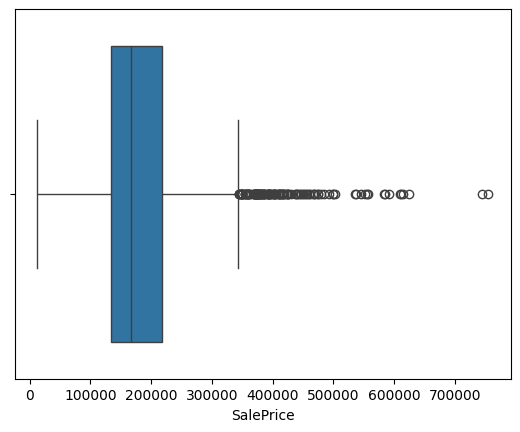

In [48]:
sns.boxplot(data['SalePrice'], orient='h')

<Axes: xlabel='SalePrice', ylabel='Count'>

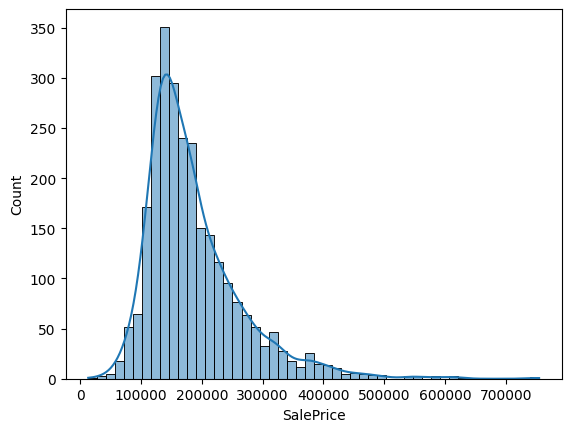

In [47]:
sns.histplot(data['SalePrice'], bins=50, kde=True)

<Axes: xlabel='Lot Frontage', ylabel='Count'>

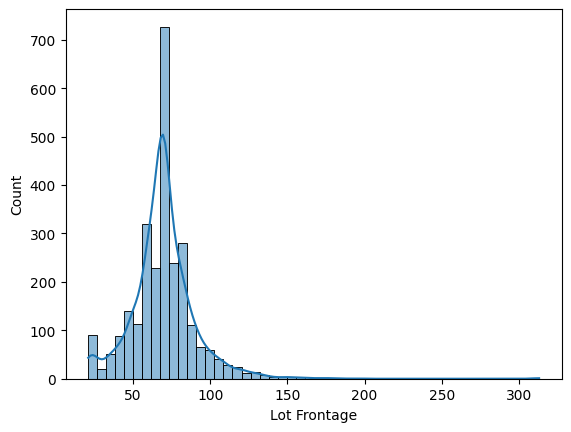

In [49]:
sns.histplot(data['Lot Frontage'], bins=50, kde=True)

<Axes: ylabel='Lot Frontage'>

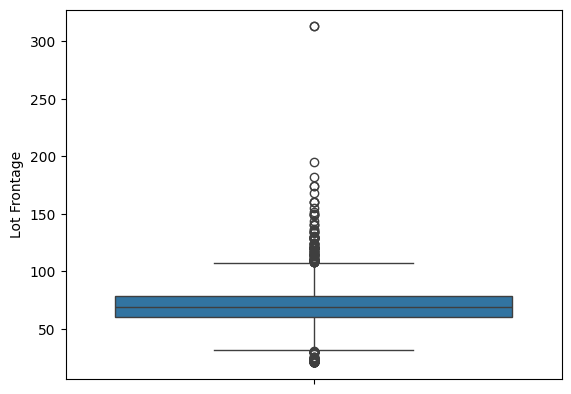

In [50]:
sns.boxplot(data['Lot Frontage'])

<Axes: xlabel='Lot Frontage'>

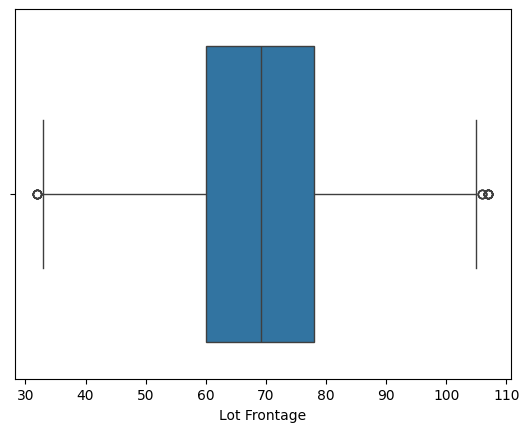

In [72]:
sns.boxplot(x=filtered_data['Lot Frontage'], orient='h')

<Axes: ylabel='Frequency'>

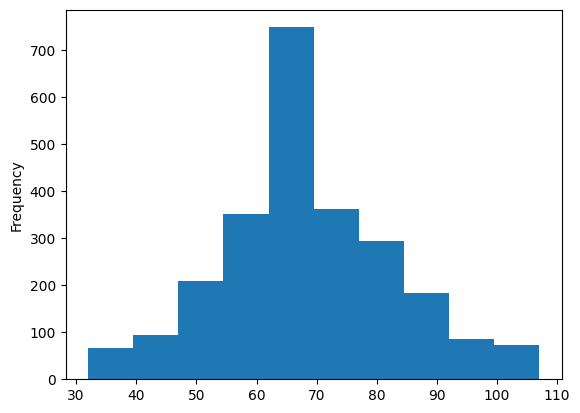

In [75]:
filtered_data['Lot Frontage'].plot(kind='hist')

In [51]:
data['Lot Frontage'].describe()

count    2678.000000
mean       69.557248
std        21.242948
min        21.000000
25%        60.000000
50%        69.224590
75%        79.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [54]:
# IQR = Q3 - Q1

Q3 = 79

Q1 = 60

IQR = Q3 - Q1

IQR

19

In [55]:
Lower_fence = Q1 - 1.5 * IQR
Upper_fence = Q3 + 1.5 * IQR

In [56]:
Lower_fence

31.5

In [57]:
Upper_fence

107.5

In [ ]:
# "Lot Frontage" < lowerFence

In [61]:
data[data['Lot Frontage'] > Upper_fence]['Lot Frontage']

0       141.0
16      152.0
18      140.0
46      110.0
59      108.0
        ...  
2785    120.0
2804    120.0
2817    134.0
2889    140.0
2924    160.0
Name: Lot Frontage, Length: 110, dtype: float64

In [63]:
data[data['Lot Frontage'].between(Lower_fence, Upper_fence)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,527105030,60,RL,78.00000,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,195500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,923250060,20,RL,80.00000,17400,Pave,Reg,Low,AllPub,Inside,...,0,0,0,0,0,5,2006,WD,Normal,160000
2925,923275080,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2928,924100070,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [65]:
filtered_data = data[(data['Lot Frontage'] > Lower_fence ) & (data['Lot Frontage'] < Upper_fence)]

In [66]:
filtered_data

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,527105030,60,RL,78.00000,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,195500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,923250060,20,RL,80.00000,17400,Pave,Reg,Low,AllPub,Inside,...,0,0,0,0,0,5,2006,WD,Normal,160000
2925,923275080,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2928,924100070,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


<Axes: ylabel='Frequency'>

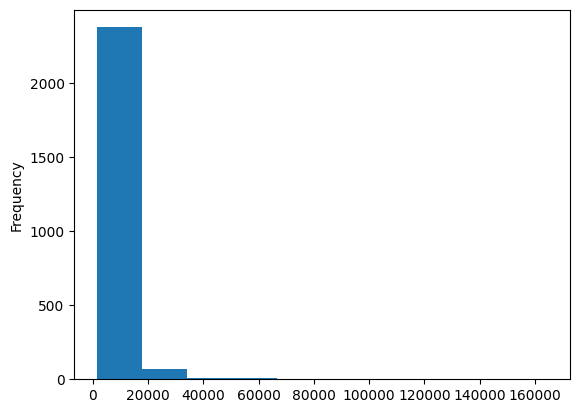

In [68]:
filtered_data['Lot Area'].plot(kind='hist')

<Axes: xlabel='Lot Area', ylabel='Count'>

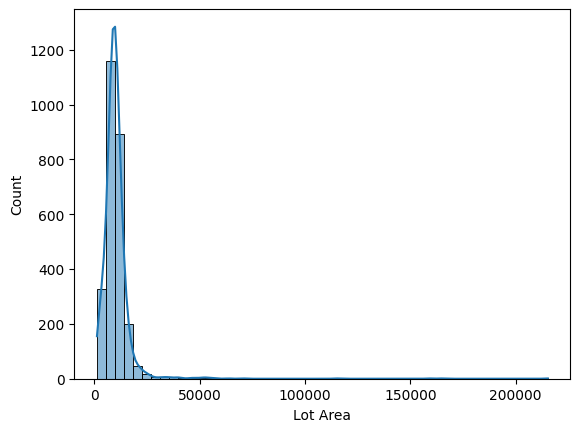

In [69]:
sns.histplot(data['Lot Area'], bins=50, kde=True)

<Axes: xlabel='Lot Area'>

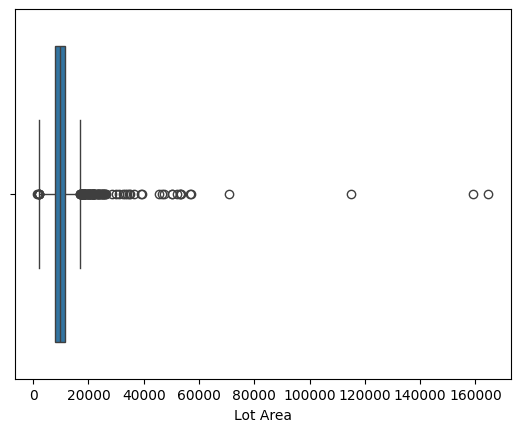

In [70]:
sns.boxplot(x=filtered_data['Lot Area'])

In [76]:
data['Lot Area'].describe()

count      2678.000000
mean      10246.545183
std        8075.049290
min        1300.000000
25%        7508.000000
50%        9555.000000
75%       11645.000000
max      215245.000000
Name: Lot Area, dtype: float64

In [77]:
Q1 = 7508
Q3 = 11645


IQR = Q3 - Q1

In [78]:
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

In [81]:
filtered_data = filtered_data[filtered_data['Lot Area'].between(lower_fence, upper_fence)]

<Axes: ylabel='Frequency'>

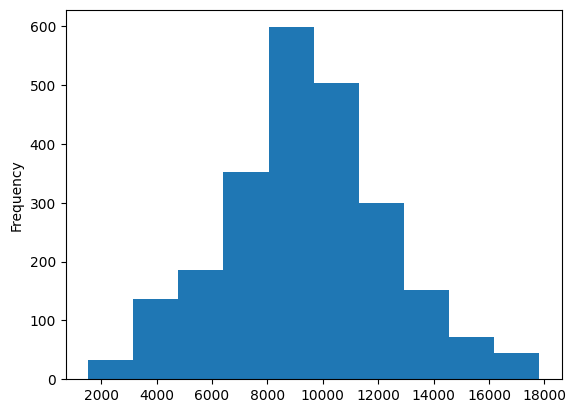

In [82]:
filtered_data['Lot Area'].plot(kind='hist')

### 3. Standarisation 

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

## 4. Model Building 

In [86]:
filtered_data

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,60,RL,78.00000,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,195500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,20,RL,80.00000,17400,Pave,Reg,Low,AllPub,Inside,Mod,...,0,0,0,0,0,5,2006,WD,Normal,160000
2925,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2928,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [85]:
filtered_data.drop(columns=['PID'], inplace=True, axis=1)

/var/folders/h8/x2xfqyjs5cl005fb579670gw0000gn/T/ipykernel_51094/3392047915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['PID'], inplace=True, axis=1)


In [87]:
features = filtered_data.drop(columns=['SalePrice'])

target = filtered_data['SalePrice'].values

In [88]:
features

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
1,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
2,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
3,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,4,2010,WD,Normal
4,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
5,60,RL,78.00000,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,20,RL,80.00000,17400,Pave,Reg,Low,AllPub,Inside,Mod,...,41,0,0,0,0,0,5,2006,WD,Normal
2925,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,0,3,2006,WD,Normal
2926,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,0,6,2006,WD,Normal
2928,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,38,0,0,0,0,0,4,2006,WD,Normal


In [92]:
features_transformed = pd.get_dummies(features)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transformed, target, test_size=0.3, random_state=42)

In [102]:
# from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [103]:
y_pred = model.predict(X_test)

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [105]:
mean_absolute_error(y_test, y_pred)

22888.73071528752

In [97]:
mean_absolute_error(y_test, y_pred)

14587.580091023949

In [106]:
mean_squared_error(y_test, y_pred)

1189771655.9593267

In [100]:
mean_squared_error(y_test, y_pred)

440585915.3152708

In [107]:
r2_score(y_test, y_pred)

0.774072389738329

In [101]:
r2_score(y_test, y_pred)

0.9163364478691759

### 3. RandomForest 

### 4. Gradient Boosting

NameError: name 'data' is not defined